# Rainfall Estimates for 2018-19 season

looking for the antecedent to the 2019 rainstorm


## Set up

In [52]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11, 4)})

## Importing data from MH weather station

CSV contains rain data from Oct 1 2018 to Feb 27 2019

Data recorded every 15 minutes

In [53]:
MH_weather_station = pd.read_csv('JerrysMHRain-2019-02-27.csv')
del MH_weather_station['datetime.1']
MH_weather_station.head(3)

,datetime,RainFall,cumulativeRain
0,2018-10-01 00:00:00,0.0,0.0
1,2018-10-01 00:15:00,0.0,0.0
2,2018-10-01 00:30:00,0.0,0.0


In [54]:
MH_weather_station['datetime'] =  pd.to_datetime(MH_weather_station['datetime'])
MH_weather_station.dtypes

datetime          datetime64[ns]
RainFall                 float64
cumulativeRain           float64
dtype: object

In [55]:
MH_weather_station = MH_weather_station[(MH_weather_station['datetime'] > '2019-02-07') & (MH_weather_station['datetime'] <= '2019-02-18')]
MH_weather_station = MH_weather_station.set_index('datetime').cumsum()

## Importing Rhonda's rain data 

CSV contains information from Jan 18 2017 to Jul 12 2019 

Data recorded every 12 minutes

In [56]:
Rhonda_weather_station = pd.read_csv('AVR_weather_thru042817.csv')
Rhonda_weather_station.head()

,Timestamp,Outdoor Temperature,Outdoor Humidity,Dew Point,Heat Index,Wind Chill,Barometric Pressure,Rain,Wind Speed,Wind Average,Peak Wind,Wind Direction,Indoor Temperature,Indoor Humidity
0,1/18/2017 16:06,47.3,90.0,45.0,47.0,41.0,29.23,7.19,15.53,15.5,30.45,180.0,60.2,51.0
1,1/18/2017 16:18,47.3,90.0,45.0,47.0,42.0,29.23,7.21,12.43,16.2,30.45,180.0,60.2,51.0
2,1/18/2017 16:30,47.5,89.0,45.0,48.0,42.0,29.23,7.22,16.16,18.6,30.45,180.0,60.0,51.0
3,1/18/2017 16:42,47.5,90.0,45.0,48.0,41.0,29.21,7.22,21.75,18.0,30.45,180.0,60.2,52.0
4,1/18/2017 16:54,47.5,90.0,45.0,48.0,41.0,29.21,7.23,19.26,16.8,30.45,180.0,60.4,53.0


In [57]:
Rhonda_weather_station['Timestamp'] = pd.to_datetime(Rhonda_weather_station['Timestamp'])
Rhonda_weather_station = Rhonda_weather_station.set_index('Timestamp')

## Importing PRISM data

Complete precip dataset from 1981 to 2019

Data recorded per day

In [105]:
PR_17 = pd.read_csv('2017wateryear_prism.csv')
PR_17.head(3)

,Date,ppt (mm)
0,10/1/2018,0.0
1,10/2/2018,0.0
2,10/3/2018,0.0


In [106]:
PR_17['Date'] =  pd.to_datetime(PR_17['Date'])
PR_17.head()
PR_17.dtypes

Date        datetime64[ns]
ppt (mm)           float64
dtype: object

In [107]:
PR_19 = pd.read_csv('2019wateryear_prism.csv')
PR_19.head(3)

,Date,ppt (mm)
0,10/1/2018,0.00
1,10/2/2018,0.00
2,10/3/2018,3.13


In [108]:
PR_19['Date'] =  pd.to_datetime(PR_19['Date'])
PR_19.head()
PR_19.dtypes

Date        datetime64[ns]
ppt (mm)           float64
dtype: object

In [98]:
#PR_17 = PR_17[(PR_17['Date'] > '2017-01-18') & (PR_17['Date'] <= '2017-02-28')]
#PR_17 = PR_17.set_index('Date').cumsum()
#PRISM_19 = PRISM_RhondasHill[(PRISM_RhondasHill['Date'] > '2019-01-18') & (PRISM_RhondasHill['Date'] <= '2019-02-28')]
#PR_19 = PR_19.set_index('Date').cumsum()


## Plots

Attempting to look for antecedent rainfall.

Comparing all of the datasets to look for holes and to try and get a consistent intensity/precip for the season

In [10]:
import matplotlib.dates as mdates

C:\Users\maryn\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


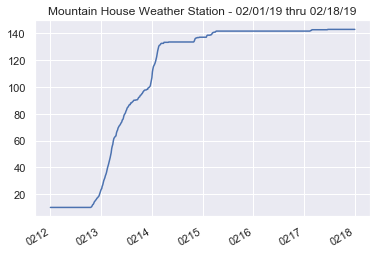

In [11]:
days = mdates.DayLocator()
hours = mdates.HourLocator()

fig, ax01 = plt.subplots()
ax01.plot(MH_weather_station.loc['2019-02-12':'2019-02-18', 'RainFall'])
plt.title('Mountain House Weather Station - 02/01/19 thru 02/18/19')

ax01.xaxis.set_major_locator(days)
ax01.xaxis.set_minor_locator(hours)
ax01.xaxis.set_major_formatter(mdates.DateFormatter('%m''%d'))

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

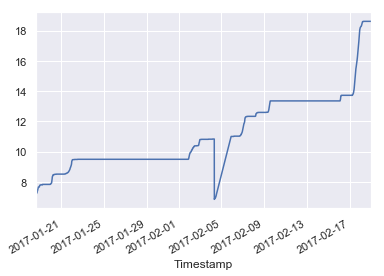

In [12]:
ax = Rhonda_weather_station.loc['2017-01-18':'2017-02-18', 'Rain'].plot()

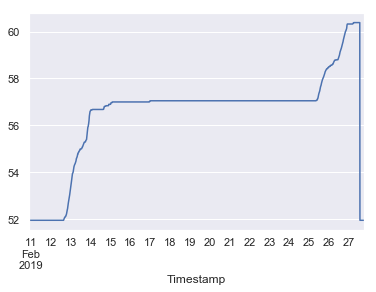

In [13]:
ax2 = Rhonda_weather_station.loc['2019-02-01':'2019-03-18', 'Rain'].plot()

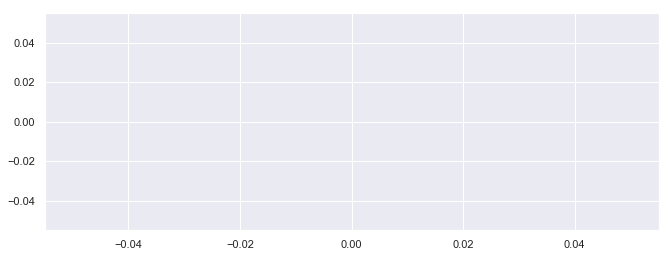

In [109]:
#PR_17['Date'] = PRISM_17.index.to_series().dt.strftime('%b')
#PRISM_19['Date'] = PRISM_19.index.to_series().dt.strftime('%b')


fig, ax = plt.subplots()
ax.plot(PR_17.loc['2018-10-01':'2019-02-28', 'ppt (mm)'], linestyle='-')
ax.plot(PR_19.loc['2018-10-01':'2019-02-28', 'ppt (mm)'], linestyle='-')

#ax.set_ylabel('Daily Consumption (GWh)')
#ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
#ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth))
# Format x-tick labels as 3-letter month name and day number
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


#ax001 = PR_17.plot(x='Date', y='ppt (mm)')
#ax001 = PRISM_17.plot(x='Date', y='ppt (mm)', ax=ax)

#ax001 = PR_17.loc['2018-10-01':'2019-02-28', 'ppt (mm)'].plot()
#ax001 = PR_19.loc['2018-10-01':'2019-02-28', 'ppt (mm)'].plot()

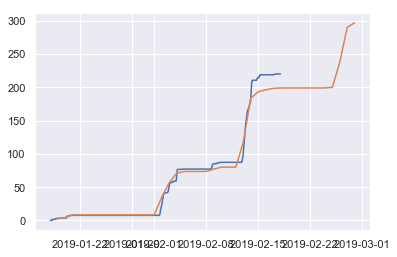

In [15]:
fig, ax = plt.subplots()
ax.plot(MH_weather_station.loc['2019-01-18':'2019-02-28', 'RainFall'])
ax.plot(PRISM_RhondasHill)